## iPyLeaflet
[ipyleaflet](https://github.com/ellisonbg/ipyleaflet) is a bridge between jupyter notebooks and the [leaflet](http://leafletjs.com/)  javascript library for drawing maps.

ipyleaflet comes with a few examples notebooks (this notebook was derived from one) but very little documentation,
for more documentation read the [Leaflet IPA](http://leafletjs.com/reference.html)

For installation directions, see the README on [ipyleaflet](https://github.com/ellisonbg/ipyleaflet)

[GeoJson](https://tools.ietf.org/html/rfc7946#section-3.1.7) is a good way to add data on top of an ipyleaflet map.

For other backgrounds than open streets, you can alter the ipyleaflet.py file to point to one of [these map providers](https://leaflet-extras.github.io/leaflet-providers/preview/)

In [10]:
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

## Visualizing the distribution of the observations

## Load the required libraries

In [11]:
import pandas as pd
import numpy as np
import sklearn as sk
import urllib
import math
import pylab as plt

import sys
sys.path.append('./lib')

from leaflet import *

In [12]:
data_dir = "../../Data/Weather/"
from pickle import load
with open(data_dir+'/TOBS_residuals_PCA.pickle','rb') as file:
    Res_eig=load(file)
print Res_eig.keys()

#stations.pkl
!gunzip -c $data_dir/'stations.pkl.gz' > $data_dir/'stations.pkl'
with open(data_dir+'/stations.pkl','rb') as file:
    Stations=load(file)
Stations.head()

['eigen-vecs', 'stations']


,latitude,longitude,elevation,state,name,GSNFLAG,HCNFLAG,WMOID
ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0
AF000040930,35.3170,69.0170,3366.0,NaN,NORTH-SALANG,GSN,NaN,40930.0
AG000060390,36.7167,3.2500,24.0,NaN,ALGER-DAR EL BEIDA,GSN,NaN,60390.0


In [13]:
import pandas as pd
Eig=pd.DataFrame(Res_eig['eigen-vecs'].transpose())
Eig.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.301794,0.014536,0.023928,-0.164099,-0.025507,-0.123869,-0.031715,0.210088,-0.138409,0.119737
1,-0.215967,0.143271,-0.050127,-0.043334,-0.042219,0.054867,-0.006862,0.165162,-0.021519,0.092311
2,0.017817,-0.145619,-0.535928,-0.033678,0.248761,0.178196,0.119977,0.026960,0.087154,-0.087879
3,-0.212840,0.142497,-0.037268,-0.044834,-0.068971,0.036455,0.066981,0.051333,0.246780,-0.090783
4,-0.005035,-0.104477,-0.177861,-0.017719,0.056627,0.226220,-0.014941,0.251267,-0.009406,-0.466302


In [14]:
Eig['station']=Res_eig['stations']
Eig=Eig.set_index('station')
print Res_eig['stations'][:5]
Eig.head()

[u'USC00290199', u'USC00291286', u'USC00294009', u'USC00299128', u'USC00290200']


,0,1,2,3,4,5,6,7,8,9
station,,,,,,,,,,
USC00290199,-0.301794,0.014536,0.023928,-0.164099,-0.025507,-0.123869,-0.031715,0.210088,-0.138409,0.119737
USC00291286,-0.215967,0.143271,-0.050127,-0.043334,-0.042219,0.054867,-0.006862,0.165162,-0.021519,0.092311
USC00294009,0.017817,-0.145619,-0.535928,-0.033678,0.248761,0.178196,0.119977,0.026960,0.087154,-0.087879
USC00299128,-0.212840,0.142497,-0.037268,-0.044834,-0.068971,0.036455,0.066981,0.051333,0.246780,-0.090783
USC00290200,-0.005035,-0.104477,-0.177861,-0.017719,0.056627,0.226220,-0.014941,0.251267,-0.009406,-0.466302


In [15]:
table=Eig.join(Stations,how='left')

In [16]:
table=table[['name','latitude','longitude','elevation',0,1,2,3]]
table.head(4)

,name,latitude,longitude,elevation,0,1,2,3
station,,,,,,,,
USC00290199,ALAMOGORDO,32.9181,-105.9550,1335.0,-0.301794,0.014536,0.023928,-0.164099
USC00291286,CABALLO DAM,32.8964,-107.3078,1292.0,-0.215967,0.143271,-0.050127,-0.043334
USC00294009,HILLSBORO,32.9203,-107.5656,1605.4,0.017817,-0.145619,-0.535928,-0.033678
USC00299128,TRUTH OR CONSEQUENCES,33.1406,-107.2322,1337.8,-0.212840,0.142497,-0.037268,-0.044834


In [17]:
import pylab as plt
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [30]:
table_new=table.sort([2]).iloc[-10:,:]

/Users/satishkumar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


## Map

In [31]:
min_lat,max_lat,min_long,max_long = box = (32.3789, 33.35, -109.1214,-105.1333)
center = [(min_lat+max_lat)/2, (min_long+max_long)/2]
zoom = 9
m = Map(default_tiles=TileLayer(opacity=0.6), center=center, zoom=zoom)
r = Rectangle(bounds=[[min_lat,min_long],[max_lat,max_long]], weight=5, fill_opacity=0.0)
m += r

lat_margin=(max_lat-min_lat)/4
long_margin=(max_long-min_long)/4
for index,row in table_new.iterrows():
    _lat=row['latitude']
    _long=row['longitude']
    for col in range(4):
        _coef=row[col]
        if np.isnan(_coef):
            continue
        r=abs(_coef)/5
        #print r
        color=colors[col]
        signs=[[+1,+1],[+1,-1],[-1,-1],[-1,+1]]
        lat_sign,long_sign=signs[col]
        triangle=[(_lat,_long),(_lat+lat_sign*r,_long),(_lat,_long+long_sign*r),(_lat,_long)]
        if _coef<0:
            poly= Polygon(locations=triangle, weight=0,
                    color=color, opacity=0, fill_opacity=0.7,
                    fill_color=color)
        else:
            poly= Polygon(locations=triangle, weight=2,
                    color=color, opacity=0.8, fill_opacity=0,
                    fill_color=color)
        m +=poly   
m    

### excercises:
* Add a legend that relates the colors to values.
* Leaflet supports a variety of maps. See if you can get a topographical map as the background.

KeyError: 'elevation'

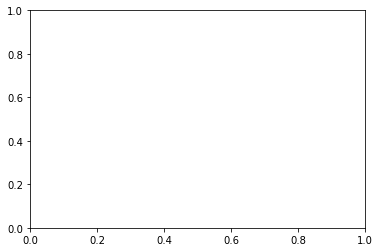

In [9]:
%matplotlib inline
Eig.plot.scatter(x='elevation',y='avg(coeff_1)');